In [24]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

In [25]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("MobileNet", ["digit"], 288)

The network is initialized random weights
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 288, 288, 3)       0         
_________________________________________________________________
model_7 (Model)              (None, 9, 9, 1024)        3228864   
_________________________________________________________________
detection_layer (Conv2D)     (None, 9, 9, 30)          30750     
_________________________________________________________________
reshape_4 (Reshape)          (None, 9, 9, 5, 6)        0         
Total params: 3,259,614
Trainable params: 3,237,726
Non-trainable params: 21,888
_________________________________________________________________


In [26]:
# 2. load pretrained weighted file

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "mobile_288_weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in C:\Users\penny\git\basic-yolo-keras\tests\dataset\svhn\mobile_288_weights.h5


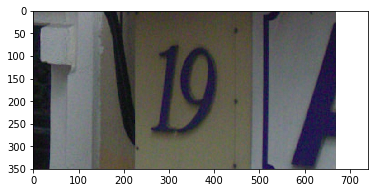

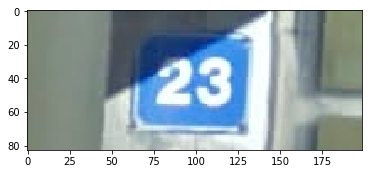

In [27]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

2-boxes are detected.


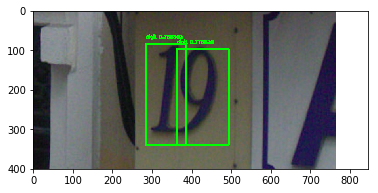

2-boxes are detected.


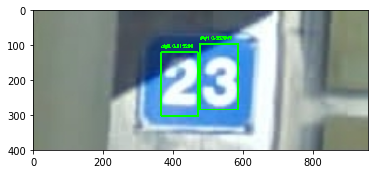

In [28]:
# 4. Predict digit region

THRESHOLD = 0.4
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img, boxes, probs, ["digit"])
    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
